# For f(x)= sin x and 0<x<pi make code to calculate area below the curve using rectangle left point, rectangle mid point, rectangle right point, trapezium, and Simpson method for 10 partition. Explain which method gives the best result. What is the analytical solution of the problem? Name each method with different function, e.g rectl(), rectm(), rectr(), trapez(), and simpson() with xbeg, xend, partition as parameters.

In [1]:
import math

#definisikan f(x) = sin(x)
def f(x):
    return math.sin(x)

#fungsi rectangle left point
def rectl(n):
    a = 0
    b = math.pi
    dx = (b-a)/n
    area = 0
    for i in range(n):
        x = a + i*dx
        area += f(x)*dx
    return area

#fungsi rectangle mid point
def rectm(n):
    a = 0
    b = math.pi
    dx = (b-a)/n
    area = 0
    for i in range(n):
        x = a + (i+0.5)*dx
        area += f(x)*dx
    return area

#fungsi rectangle right point
def rectr(n):
    a = 0
    b = math.pi
    dx = (b-a)/n
    area = 0
    for i in range(n):
        x = a + (i+1)*dx
        area += f(x)*dx
    return area

#fungsi trapezium method
def trapez(n):
    a = 0
    b = math.pi
    dx = (b-a)/n
    area = 0
    for i in range(n):
        x1 = a + i*dx
        x2 = a + (i+1)*dx
        area += (f(x1) + f(x2))*dx/2
    return area

#fungsi rectangle right point
def simpson(n):
    a = 0
    b = math.pi
    dx = (b-a)/n
    area = 0
    for i in range(n):
        x1 = a + i*dx
        x2 = a + (i+1)*dx
        xm = (x1 + x2)/2
        area += (f(x1) + 4*f(xm) + f(x2))*dx/6
    return area

#masukan data awal berupa besaran partisi
n = 10

#output berupa luas dibawah kurva sin(x) dari 0<x<pi
#bandingkan hasil dari seluruh method
print('Luas Metode Rectangle Left Point = ',rectl(n))
print('Luas Metode Rectangle Mid Point = ',rectm(n))
print('Luas Metode Rectangle Right Point = ',rectr(n))
print('Luas Metode Trapezium = ',trapez(n))
print('Luas Metode Simpson = ',simpson(n))

Luas Metode Rectangle Left Point =  1.9835235375094544
Luas Metode Rectangle Mid Point =  2.0082484079079745
Luas Metode Rectangle Right Point =  1.9835235375094544
Luas Metode Trapezium =  1.9835235375094546
Luas Metode Simpson =  2.0000067844418012


Dari seluruh metode untuk pengukuran luas dibawah kurva, nilai luas menggunakan metode simpson memiliki nilai yang paling mendekati dengan hasil analitik yaitu luas kurva di bawah fungsi sin x dari 0 hingga pi = 2

# Using Finite Difference Method (FDM) find plot the curve of vertical position y againts time t for a free fall motion if y0 = 10m, yt = 20m, g = -10m/s^2 with number of grid n=10,20,40,80,160by modifying a code. Explain the form of the curve. Which gives better result?

C:\Users\Asus\AppData\Local\Temp\ipykernel_17576\3496307097.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


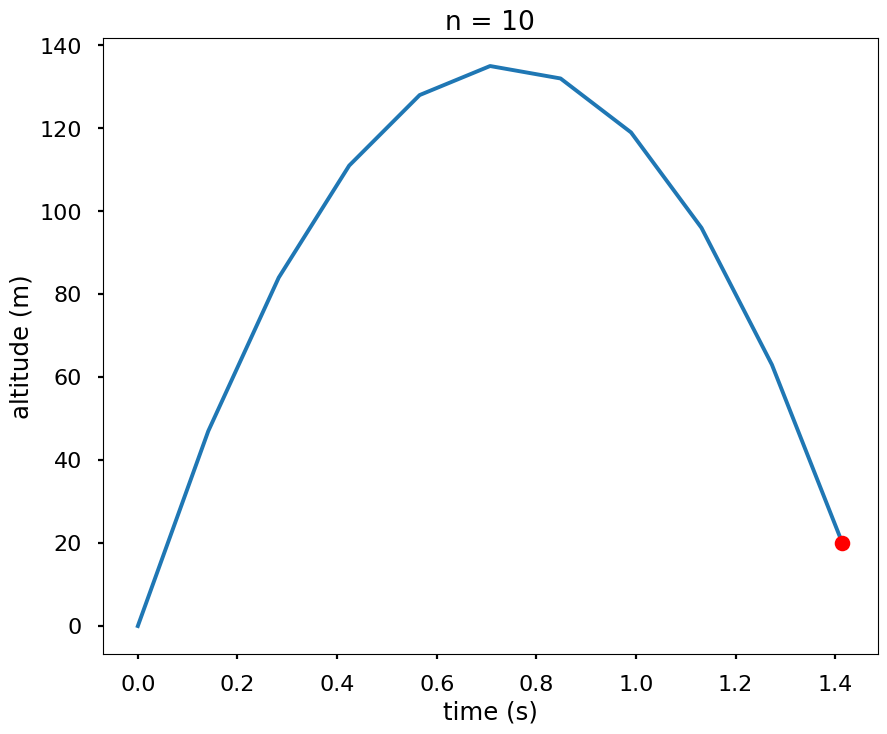

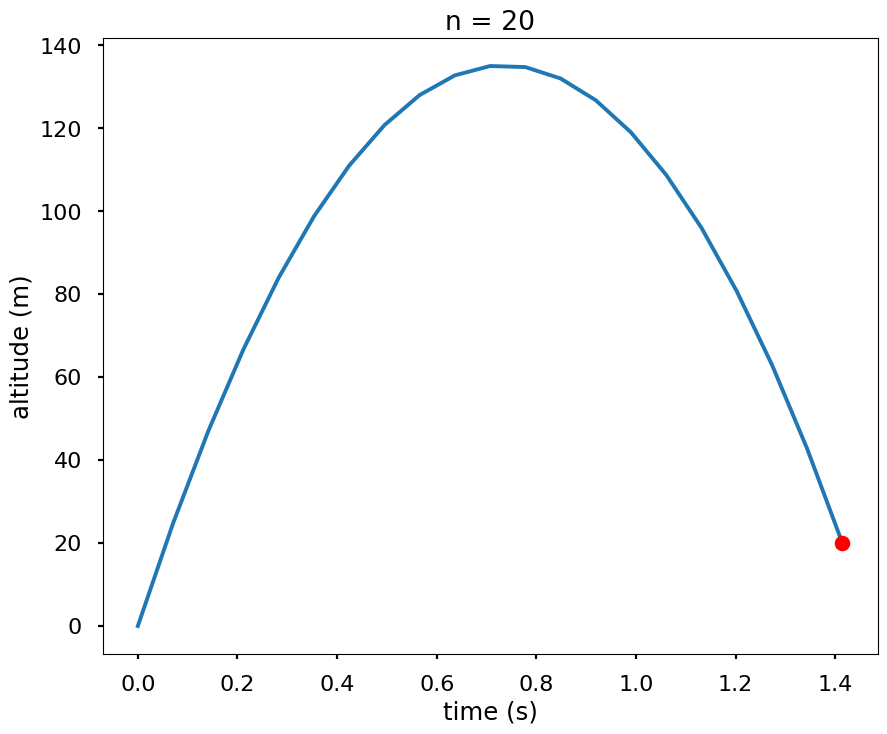

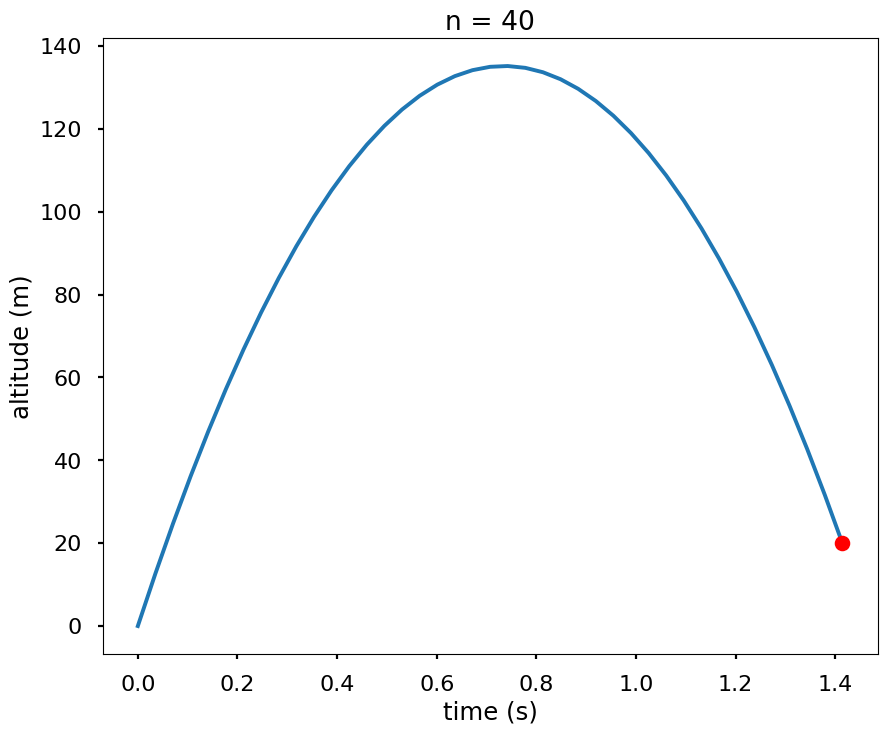

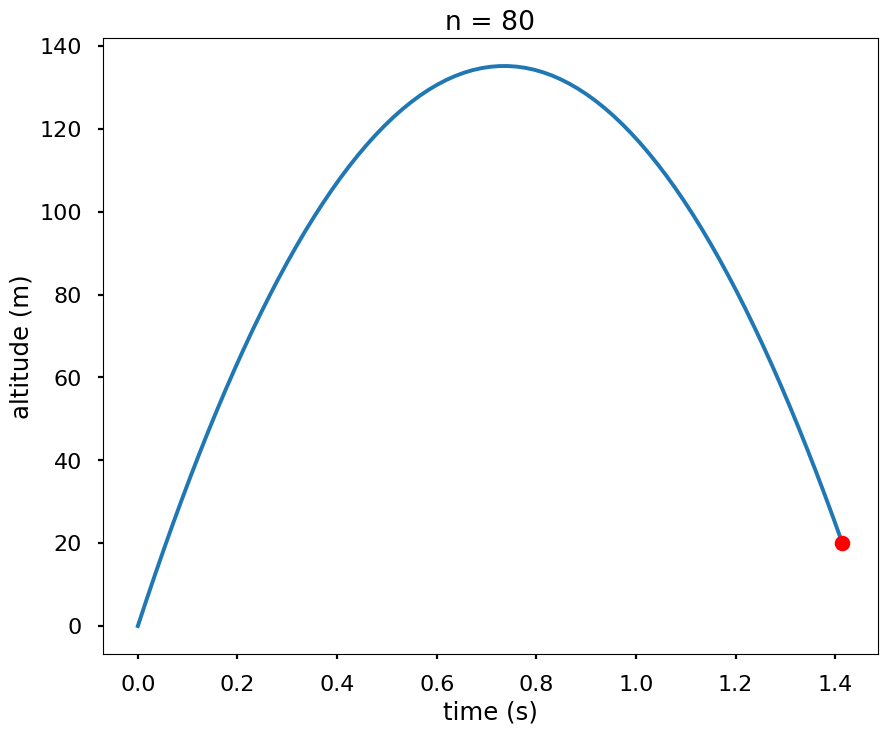

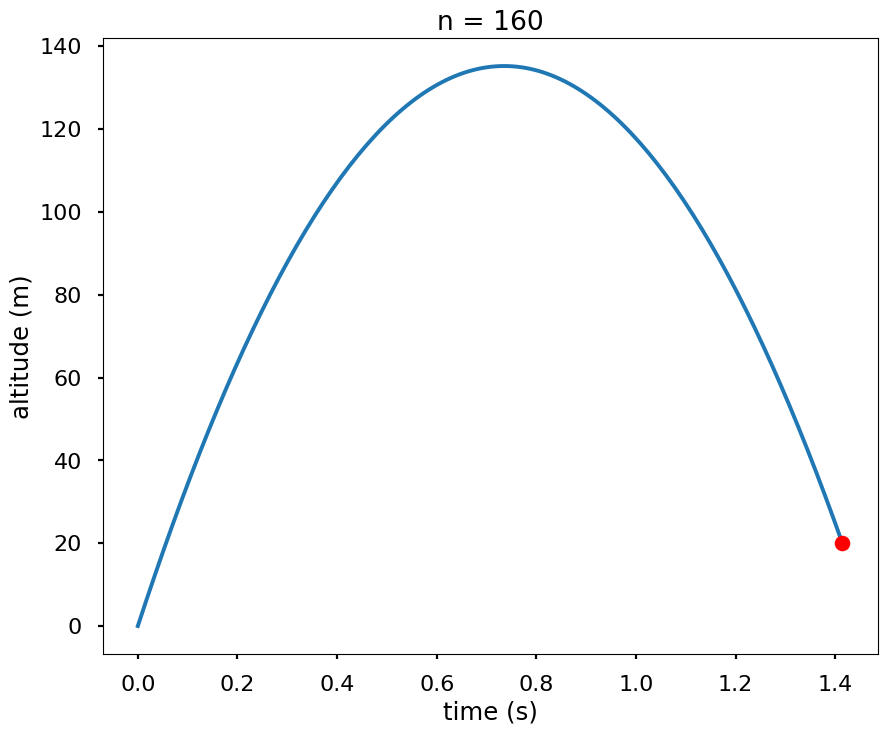

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

# Define initial and final positions, and gravitational acceleration
y0 = 10
yt = 20
g = -10

# Define grid sizes
n_list = [10, 20, 40, 80, 160]

# Loop through each grid size and plot the curve
for n in n_list:
    h = (yt-y0) / n

    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = 1
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2
        A[i, i+1] = 1

    # Get b
    b = np.zeros(n+1)
    b[1:-1] = g*h**2
    b[-1] = yt

    # solve the linear equations
    y = np.linalg.solve(A, b)

    t = np.linspace(0, np.sqrt(2*(yt-y0)/(-g)), n+1)

    plt.figure(figsize=(10,8))
    plt.plot(t, y)
    plt.plot(np.sqrt(2*(yt-y0)/(-g)), yt, 'ro')
    plt.xlabel('time (s)')
    plt.ylabel('altitude (m)')
    plt.title('n = {}'.format(n))
    plt.show()
    

Dari hasil di atas bentuk kurva dengan  n = 160 akan memiliki bentuk kurva yang lebih halus dikarenakan jumlah partisi yang banyak menyebabkan nilai dx pada fungsi turunannya akan medekati nol. Hal ini sesuai dengan diferensial dimana ketika turunannya memiliki dx yang mendekati nol, maka kurva akan semankin halus dan mendekati nilai asli. Sedangkan nilai dengan partisi n=10 akan memiliki kurva yang terbentuk dengan banyak garis putus-putus dan terlihat kasar.